# Hands-on Project

<span style="color:red">**Question 1:** </span> List the dataset(s) you chose for this project from the [UCI Machine Learning respository](https://archive.ics.uci.edu/ml/datasets.php).

Solar Flare Data Set
http://archive.ics.uci.edu/ml/datasets/solar+flare

<span style="color:red">**Question 2:** </span> Describe the dataset in your own words. How many data points, how many attributes, how many types of attributes, how many classes (if any)? Who collected it? How was it collected?

This data set lists examines solar flare active regions of the sun, and lists the corresponding featrures of that area. In the first dataset, there are 323 data points. In the second dataset, there are 1066 data points. The second data set features error correction and more data. I will analyze both to look for trends. Each data point has 13 attrobites. The first 3 attributes classify the solar flares into classes, largest spot size, and spot distribution. Gary Bradshaw published the data on March 1989. It is not listed exactly how he collected the data, but wherever he collected the data from, they examined spots of the sun over a period of 24 hours.

<span style="color:red">**Question 3:** </span> What is your goal? Specifically, what insights do you want to learn from this data. Please be aware that clustering, classification, or itemset mining are not 'insights'. These are data mining tasks. Insights are relevant to the domain from which the data is generated.

My goal is to examine the different attributes and determine which attributes differentiate the solar flares the most. From this information, I will be able to conclude the most significant factors that differentiate the amount of future activity for the solar flare. From this, organizations will be able to focus in on specific attributes of solar flares to gain deeper insights to this phenomenon.

<span style="color:red">**Question 4:** </span> List the data mining task(s) and the specific algorithms you want to perform on this data. Do not pick the tasks listed in the 'Default Task' column on the UCI page.

I will be utilizing PCA in order to reduce the dimensionality of the dataset. I will then take the reduced dimensionality and plot it both in 2D and 3D and then run K-Means clustering to determine if the data has been distinguished in any way. By using the eigenvectors and examining resulting clusters, I will be able to determine which of the properties of the solar flares differentiates them from each other most.

<span style="color:red">**Question 5:** </span> Before selecting the methods you listed in response to Question 4, what are all methods you originally considered to use for the selected data mining task? What was your rationale for selecting the methods you listed in response to Question 4? What was your rationale for not selecting other methods?


I originally intended to just run clustering and plotting 2 or 3 of the attributes. I then realized that the first 3 of the attributes are codes for the categories that the flares fall into, and the following 7 are properties of the solar flare itself. Since these 7 attributes cannot be plotted, I decided that PCA would enable me to figure out which ones are the most significant in differentiating the data.

<span style="color:red">**Question 6:** </span> What limitations does your 'selected' method(s) has(have) that may limit your ability to accomplish the goal you have set for yourself? 


PCA is not completely resilient to outliers. If there are outliers, this may effect the output of the principles components and the corresponding eigenvalues and eigenvectors.

<span style="color:red">**Question 7:** </span> Do you have any alternative plan/strategy to overcome the above limitation(s)?

Upon plotting the data, I noticed that there were not many outliers. This will likely not affect PCA enough to sway things. I have also utilized K-Means clustering to isolate these outliers.

<span style="color:red">**Question 8:** </span> For each of the methods you want to use, what parameter choices do you want to use and why? It does not have to be one parameter choice, it could be a collection or a range of choices you may want to consider.

For the PCA, I am running both 3 principle components and 2 principle components and plotting the result. The input for these Principle Component Analysis operations will be:
    Activity,
    Evolution,
    Previous 24 Hour Flare Activity Code,
    Historically-Complex,
    Did Region Become Historically Complex On This Pass Across The Sun's Disk, Area,
    Area Of The Largest Spot,
    C-Class,
    M-Class,
    X-Class

I am using these because they are all the attributes that are not pre-classified codes. This will enable me to distinguish which ones carried the most influence over the flares.

<span style="color:red">**Question 9:** </span> How will you evaluate that you are successful in your pursuing your goal at the end of the project? In other words, what is your evaluation criteria?


I will be looking for dominant values in the eigenvectors corresponding to the eigenvalues. If there are a few attributes that carry much more weight than the others, I will consider myself successful. I will also perform K-Means Clustering on the lower dimensional result from the PCA. If I find clear clusters, I will consider myself successful in determining which attributes successfully distinguish the flares from each other.

<span style="color:red">**Question 10:** </span> How will you evaluate that you are successful in your pursuing your goal at the end of the project? In other words, what is your evaluation criteria?


Same as Question 9

<span style="color:red">**Question 11:** </span> Show any visualizations you may have generated to understand your data. Please include the code you used and the plots below. If you borrowed code (entirely or partially) from the hands-on projects or anywhere else, clearly provide a link to your source.

You may use this package to load UCI data in python: https://github.com/SkafteNicki/py_uci

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
from pandas import DataFrame as df
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering, DBSCAN
from sklearn.mixture import GaussianMixture
import os.path

     0  1  2  3  4  5  6  7  8  9  10  11  12
0    C  S  O  1  2  1  1  2  1  2   0   0   0
1    D  S  O  1  3  1  1  2  1  2   0   0   0
2    C  S  O  1  3  1  1  2  1  1   0   0   0
3    D  S  O  1  3  1  1  2  1  2   0   0   0
4    D  A  O  1  3  1  1  2  1  2   0   0   0
..  .. .. .. .. .. .. .. .. .. ..  ..  ..  ..
318  C  R  O  1  2  1  2  2  1  2   0   0   0
319  D  R  O  1  3  1  1  2  1  2   0   0   0
320  E  A  O  1  3  1  1  2  1  2   0   0   0
321  C  R  O  1  3  1  1  2  1  1   0   0   0
322  E  K  C  1  3  1  1  2  2  2   0   2   0

[323 rows x 13 columns]


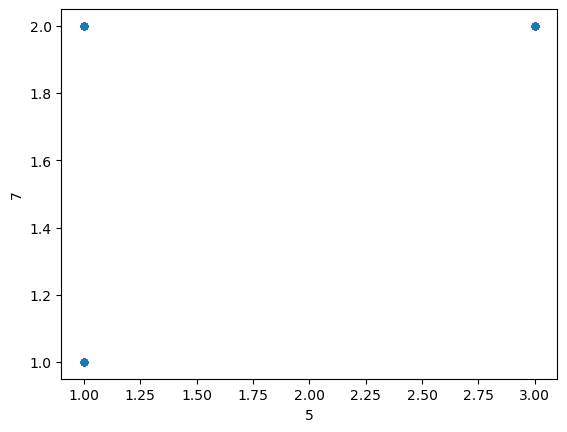

In [18]:

df = pd.read_csv("./flare-data/newflare.data1",header=None,names=["0","1","2","3","4","5","6","7","8","9","10","11","12"])
print(df)

df.plot.scatter(x="5",y="7")
plt.show()

<span style="color:red">**Question 12:** </span> **Perform data mining, evaluate your work and report your findings.** This should include code, plots and results you may have generated. If you borrowed code (entirely or partially), clearly provide a link to your source.

In [1]:

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
from pandas import DataFrame as df
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering, DBSCAN
from sklearn.mixture import GaussianMixture
import os.path

In [2]:

def reorder_data(in_file_path,out_file_path):
    if not os.path.isfile(out_file_path):
        with open(out_file_path, "w+") as write:
            with open(in_file_path, "r") as read:
                file_lines = read.readlines()
                for line in file_lines:
                    if not line[0] == "*":
                        write.write(line.replace(" ",","))

def get_choice():
    choice = 0
    while not (choice == "1" or choice == "2"):
        choice = input("Enter 1 or 2 to run dataset 1 or dataset 2: ")
    choice = int(choice)
    return choice

In [3]:
reorder_data("./flare-data/flare.data1","./flare-data/newflare.data1")
reorder_data("./flare-data/flare.data2","./flare-data/newflare.data2")

In [4]:

pca = PCA(n_components=2)

PCA Eigenvalues:
[[ 0.30104652 -0.36800885  0.69154289  0.39283617  0.03807164  0.0781027
   0.19755702  0.11917244  0.28173009  0.03516379]
 [ 0.09999695  0.86450475  0.11721744  0.10776337  0.02198605  0.05751716
   0.10933971  0.20663458  0.39686893  0.03646487]]
Explained Variance:
[0.4940178  0.35944637]
Singular Values:
[12.61244352 10.75833316]


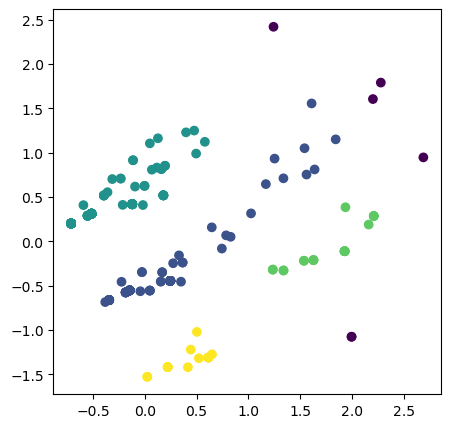

In [6]:

df = pd.read_csv("./flare-data/newflare.data1",header=None,names=["0","1","2","3","4","5","6","7","8","9","10","11","12"])
pca.fit(df[["3","4","5","6","7","8","9","10","11","12"]])
transformed_data = pca.transform(df[["3","4","5","6","7","8","9","10","11","12"]])
print(f"PCA Eigenvalues:\n{pca.components_}")
print(f"Explained Variance:\n{pca.explained_variance_}")
print(f"Singular Values:\n{pca.singular_values_}")
clustering = DBSCAN(min_samples=3).fit(transformed_data)
zipped_data = list(zip(*transformed_data))
zipped_data.append(clustering.labels_)

fig = plt.figure(1,figsize=(5,5))
plt.clf()

ax = fig.add_subplot()
ax.scatter(zipped_data[0],zipped_data[1], c=zipped_data[2])
plt.show()

PCA Eigenvalues:
[[ 1.49268842e-01  6.44578353e-02  8.47951485e-02  1.53575932e-01
   5.59409128e-02  3.66645816e-02 -0.00000000e+00  9.66295213e-01
   6.74609802e-02  6.09238521e-03]
 [ 6.34606975e-02 -9.46273685e-01  4.57098619e-02  3.12893454e-01
  -1.95972850e-03 -1.04279044e-03  0.00000000e+00  1.35798538e-03
  -2.32391079e-02 -5.66122981e-04]]
Explained Variance:
[0.73247579 0.40174608]
Singular Values:
[27.93003246 20.68476672]


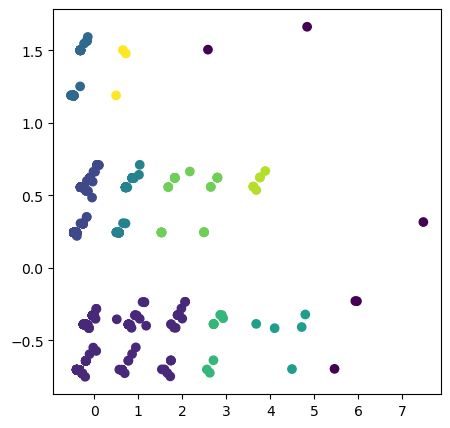

In [7]:

df2 = pd.read_csv("./flare-data/newflare.data2",header=None,names=["0","1","2","3","4","5","6","7","8","9","10","11","12"])
pca.fit(df2[["3","4","5","6","7","8","9","10","11","12"]])
transformed_data = pca.transform(df2[["3","4","5","6","7","8","9","10","11","12"]])
print(f"PCA Eigenvalues:\n{pca.components_}")
print(f"Explained Variance:\n{pca.explained_variance_}")
print(f"Singular Values:\n{pca.singular_values_}")
clustering = DBSCAN(min_samples=3).fit(transformed_data)
zipped_data = list(zip(*transformed_data))
zipped_data.append(clustering.labels_)

fig = plt.figure(1,figsize=(5,5))
plt.clf()

ax = fig.add_subplot()
ax.scatter(zipped_data[0],zipped_data[1], c=zipped_data[2])
plt.show()

In [8]:

pca = PCA(n_components=3)

PCA Eigenvalues:
[[ 0.30104652 -0.36800885  0.69154289  0.39283617  0.03807164  0.0781027
   0.19755702  0.11917244  0.28173009  0.03516379]
 [ 0.09999695  0.86450475  0.11721744  0.10776337  0.02198605  0.05751716
   0.10933971  0.20663458  0.39686893  0.03646487]
 [-0.15683039 -0.24863508 -0.60690065  0.41625483  0.00172987  0.00616338
   0.32479423  0.36440577  0.36400326  0.0341487 ]]
Explained Variance:
[0.4940178  0.35944637 0.26270692]
Singular Values:
[12.61244352 10.75833316  9.19737064]


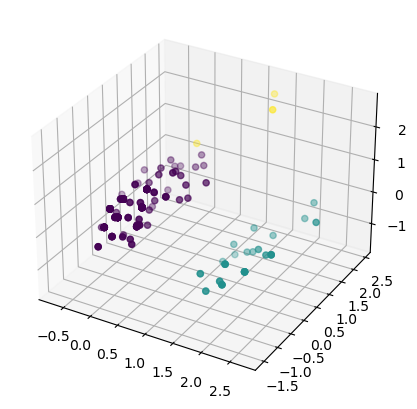

In [9]:

df = pd.read_csv("./flare-data/newflare.data1",header=None,names=["0","1","2","3","4","5","6","7","8","9","10","11","12"])
pca.fit(df[["3","4","5","6","7","8","9","10","11","12"]])
transformed_data = pca.transform(df[["3","4","5","6","7","8","9","10","11","12"]])
print(f"PCA Eigenvalues:\n{pca.components_}")
print(f"Explained Variance:\n{pca.explained_variance_}")
print(f"Singular Values:\n{pca.singular_values_}")

clustering = SpectralClustering(n_clusters=3,assign_labels="cluster_qr").fit(transformed_data)
zipped_data = list(zip(*transformed_data))
zipped_data.append(clustering.labels_)

fig = plt.figure(1,figsize=(5,5))
plt.clf()

ax = fig.add_subplot(projection="3d")
ax.scatter(zipped_data[0],zipped_data[1],zipped_data[2],c=zipped_data[3],cmap="viridis_r")

plt.show()

PCA Eigenvalues:
[[ 1.49268842e-01  6.44578353e-02  8.47951485e-02  1.53575932e-01
   5.59409128e-02  3.66645816e-02 -0.00000000e+00  9.66295213e-01
   6.74609802e-02  6.09238521e-03]
 [ 6.34606975e-02 -9.46273685e-01  4.57098619e-02  3.12893454e-01
  -1.95972850e-03 -1.04279044e-03  0.00000000e+00  1.35798538e-03
  -2.32391079e-02 -5.66122981e-04]
 [ 3.41767230e-01  2.98175059e-01  2.19841129e-01  8.10740092e-01
   1.00898433e-01  9.04472181e-02 -6.93889390e-18 -2.38170638e-01
   1.13010389e-01  2.82733410e-02]]
Explained Variance:
[0.73247579 0.40174608 0.23601603]
Singular Values:
[27.93003246 20.68476672 15.85424477]


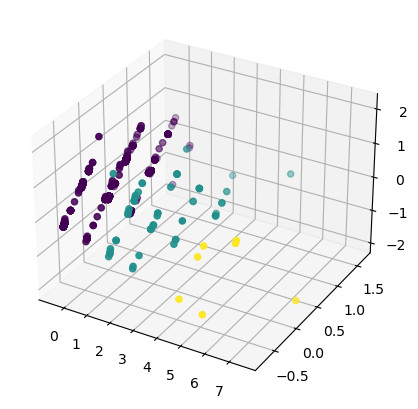

In [10]:
df2 = pd.read_csv("./flare-data/newflare.data2",header=None,names=["0","1","2","3","4","5","6","7","8","9","10","11","12"])
pca.fit(df2[["3","4","5","6","7","8","9","10","11","12"]])
transformed_data = pca.transform(df2[["3","4","5","6","7","8","9","10","11","12"]])

print(f"PCA Eigenvalues:\n{pca.components_}")
print(f"Explained Variance:\n{pca.explained_variance_}")
print(f"Singular Values:\n{pca.singular_values_}")

clustering = SpectralClustering(n_clusters=3,assign_labels="cluster_qr").fit(transformed_data)
zipped_data = list(zip(*transformed_data))
zipped_data.append(clustering.labels_)

fig = plt.figure(1,figsize=(5,5))
plt.clf()

ax = fig.add_subplot(projection="3d")
ax.scatter(zipped_data[0],zipped_data[1],zipped_data[2],c=zipped_data[3],cmap="viridis_r")

plt.show()

<span style="color:red">**Question 13:** </span> Putting your findings in the context of your goal and evaluation plan, do you consider yourself successful? Provide reasons for your success or lack thereof.

<span style="color:red">**Question 14:** </span> If you have an extra month to work on this project, what else would you do? Provide reasons.

<span style="color:red">**Question 15:** </span> Do you consider this project to be in the 'innovative category' or a 'good application' category? Provide your reason. 

I think that it is in between the two. The UCI database listed this as Regression. I have utilized PCA to distinguish the key differences between the characteristics of solar flares.